## 1/ Python Basics with Numpy

### 1.1/ Implementing the following sigmoid function using Numpy


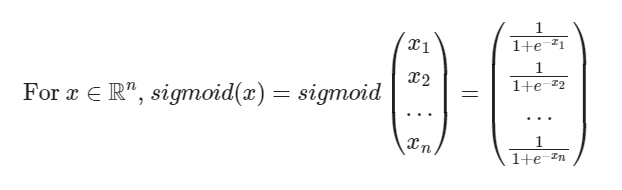


In [14]:
import numpy as np
import cv2

#function returning sigmoid function s
#x can either be a real number, vector or a matrix
def sigmoid(x):
     s = 1/(np.exp(-x) + 1)
     return s

#example using array x 
x = np.array([1, 2, 3])
sigmoid(x)


array([0.73105858, 0.88079708, 0.95257413])

### 1.2/ Computing the gradient of the sigmoid function with respect to its input x. 
We need to compute gradients to optimize loss functions using backpropagation. The formula is:
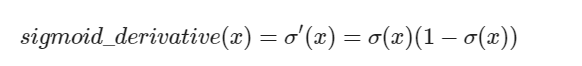

In [15]:
def sigmoid_derivative(x):
    
    s = sigmoid(x)
    ds = s*(1-s)
    
    return ds

x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


### 1.3/ Reshaping arrays

Two common numpy functions used in deep learning are np.shape and np.reshape()

    X.shape is used to get the shape (dimension) of a matrix/vector X
    X.reshape(...) is used to reshape X into some other dimension
    
    
For example, in computer science, an image is represented by a 3D array of shape. However, when you read an image as the input of an algorithm you convert it to a vector of shape. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

![image.png](attachment:image.png)

In [16]:
#A function that takes an input of shape (length, height, 3) and returns a vector of shape (length*height*3, 1)

def image2vector(image):

    v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    
    return v

In [17]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))


image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


### 1.4/ Normalizing Data
Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. 

In [19]:
#A function to normalize the rows of a matrix

def normalizeRows(x):
  
    x_norm = np.linalg.norm(x,axis = 1,keepdims=True)
    x = x/x_norm

    return x

x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


## 2/ Vectorization
In deep learning, you deal with very large datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can result in a model that takes ages to run. To make sure that your code is computationally efficient, you will use vectorization. For example, try to tell the difference between the following implementations of the dot/outer/elementwise product.